# Dijkstra's algorithm

**Goal**: Implement Dijkstra's algorithm to find shortest paths for weighted directed graphs and measure it's running time.

Below, you can see a subset of the Swiss-German railway network: a vertex corresponds to a city while an arc corresponds to a train line between the two cities with the travel time in minutes as the arc weight (taken from `www.sbb.ch` of the shortest direct connection).

For the sake of simplicity, we look only at the travel times between the cities and don't take into account the transfer time.

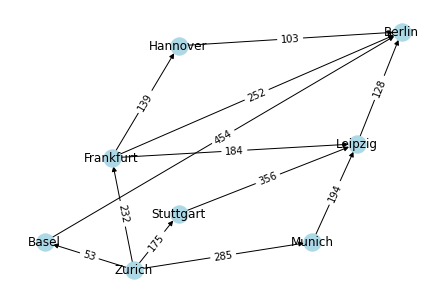

In [10]:
import networkx as nx

# Create graph G
G = nx.DiGraph()
node_pos = {'Zurich': (2,0), 'Basel': (-2,2), 'Munich': (10,2), 'Stuttgart': (4,4), 'Frankfurt': (1,8), 'Hannover': (4,16), 'Leipzig': (12,9), 'Berlin': (14,17)}
G.add_nodes_from(node_pos.keys())
G.add_edges_from([('Zurich','Basel',{'weight': 53}),
                  ('Zurich','Frankfurt',{'weight': 60*3+52}),
                  ('Zurich','Munich',{'weight': 60*4+45}),
                  ('Zurich','Stuttgart',{'weight': 60*2+55}),
                  ('Hannover','Berlin',{'weight': 60*1+43}),
                  ('Frankfurt','Leipzig',{'weight': 60*3+4}),
                  ('Frankfurt','Hannover',{'weight': 60*2+19}),
                  ('Frankfurt','Berlin',{'weight': 60*4+12}),
                  ('Munich','Leipzig',{'weight': 60*3+14}),
                  ('Stuttgart','Leipzig',{'weight': 60*5+56}),
                  ('Basel','Berlin',{'weight': 60*7+34}),
                  ('Leipzig','Berlin',{'weight': 60*2+8})])

# Plot graph G
%matplotlib inline
nx.draw(G, with_labels=True, node_color='lightblue', pos = node_pos)
edge_draw = nx.draw_networkx_edge_labels(G, pos = node_pos, 
                                         edge_labels = nx.get_edge_attributes(G, 'weight'))

We want to find the shortest connection from *Zurich* to *Berlin*. For example, we could go via *Munich* and *Leipzig* with a traveling time of $285 + 194 + 128 = 607$ minutes, however, this is certainly not the best way of travelling.

### Implementing Dijkstra's algorithm

**Your first task**: Implement Dijkstra's algorithm as a function that takes a graph $G$ and a starting vertex $s$ and returns the shortest distances from Zurich to all other cities (as a list or a dictionary, your choice). As a guideline, you may refer to page 100 of the script.

In [11]:
# implement your function here
def dijkstra(G, s):
    d = {v: float('inf') for v in G.nodes()} # initialize distances as infinity
    d[s] = 0 # the distance from the starting node s to itself is 0
    M = set() # the set of yet explored vertices is initalized as empty
    while M != set(G.nodes()):
        M_comp = set(G.nodes()) - M # complement of M
        d_comp = {node: d[node] for node in M_comp} # distances of yet unused nodes
        v = min(d_comp, key=d_comp.get) # current position
        M.add(v)
        for arc in G.out_edges(v):
            w = arc[1]
            l = G[v][w]['weight']
            if d[w] > d[v] + l:
                d[w] = d[v] + l
    return d

**Your second task**: Test your function on the railway network given above.

In [12]:
# test the function
print(dijkstra(G,'Zurich'))

{'Zurich': 0, 'Basel': 53, 'Munich': 285, 'Stuttgart': 175, 'Frankfurt': 232, 'Hannover': 371, 'Leipzig': 416, 'Berlin': 474}


## Measuring running time

The theoretical computational complexity of Dijkstra's algorithm depends on the data structure used to represent the graph $G=(V,A)$. For the representation used in `networkx` (namely, adjacency lists implemented via dictionaries), the complexity is

$$O(|A|+|V|^2)$$

*Remark*: As long as we disallow paralell arcs, the number of arcs $|A|$ is at most $|V|^2$ (an arc is uniquely determined by its two endpoints), which leads to a running time of $O(|A|+|V|^2) = O(|V|^2)$.

We would like to compare the theoretical computational complexity with the effective running time of our implementation of Dijkstra's algorithm. To this end, we use the module `time`, which provides a function `time()` to measure execution times. Study the code below to see how it is used.

In [13]:
import time

start_time = time.time()
print('We measure the execution time of this printing.')
end_time = time.time()
print(f'This took {end_time - start_time} seconds.')

We measure the execution time of this printing.
This took 0.001995563507080078 seconds.


**Your first task**: Measure the running time of Dijkstra's algorithm for different graphs with an exponentially increasing number of nodes $|V|$.

*Hint*: Use the function `nx.gnp_random_graph(n, p, directed=True)` for the generation of a random directed graph, where $n$ stands for the number of nodes and $p$ for the probability of arc creation.

In [14]:
import math
from random import seed, randint # use randint to generate random integers

# number of vertices for the random graphs which are exponentially increasing
number_of_nodes = [math.floor(math.pow(10,0.5*i)) for i in range(2,8)]
times = [] # list for storing measured execution times
compl = [] # list for storing the theoretical complexity |A|+|V|^2
seed(2) # set seed for reproducibility

# iterate over the number_of_nodes, generate a random graph and measure the
# running time of Dijkstra's algorithm and compute it's theoretical complexity
for n in number_of_nodes:
    G = nx.gnp_random_graph(n, 0.3, directed=True) # generate random graph
    for arc in G.edges(): # add random integer weights between 1 and 10
        G[arc[0]][arc[1]]['weight'] = randint(1,10)
    # measure execution time
    start_time = time.time()
    dijkstra(G, 0)
    end_time = time.time()
    times = times + [end_time - start_time]
    # theoretical computational complexity is |A|+|V|^2
    compl = compl + [G.number_of_nodes() + n^2]

**Your second task**: Plot the effective running time against the theoretical computational complexity $|A|+|V|^2$. What shape of the curve do you expect?

*Hint*: Use logarithmically scaled axes, i.e. `plt.xscale('log')` respectively `plt.yscale('log')`.

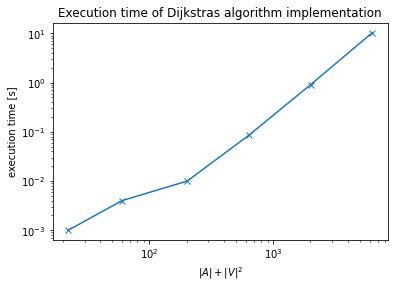

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot measured data
plt.plot(compl, times, 'x-')
plt.xscale('log') # logarithmic scale for x-axis
plt.yscale('log') # logarithmic scale for y-axis
plt.title('Execution time of Dijkstras algorithm implementation')
plt.xlabel('$|A|+|V|^2$')
plt.ylabel('execution time [s]')
plt.show()